#  Deep Learning and Image Recognition

## Pretrained Models for Inference

https://keras.io/applications/

Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

Weights are downloaded automatically when instantiating a model. They are stored at ~/.keras/models/.

In [1]:
import numpy as np
from keras.preprocessing import image
from keras.applications import resnet50, densenet
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Load Image

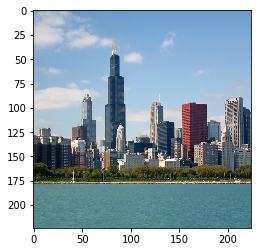

In [2]:
# Load the image file, resizing it to 224x224 pixels (required by this model)
img = image.load_img("chi.jpg", target_size=(224, 224))

plt.imshow(img)

# Convert the image to a numpy array
x = image.img_to_array(img)

# Add a forth dimension since Keras expects a list of images
x = np.expand_dims(x, axis=0)

### Load Pretrained Model

In [3]:
# Load Keras' ResNet50 model that was pre-trained against the ImageNet database
model = resnet50.ResNet50()
#model = densenet.DenseNet121()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

### Inference

In [4]:
# Scale the input image to the range used in the trained network
x = resnet50.preprocess_input(x)

# Run the image through the deep neural network to make a prediction
predictions = model.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = resnet50.decode_predictions(predictions, top=9)

print("This is an image of:")

for imagenet_id, name, likelihood in predicted_classes[0]:
    print(" - {}: {:2f} likelihood".format(name, likelihood))

This is an image of:
 - breakwater: 0.412039 likelihood
 - lakeside: 0.156228 likelihood
 - seashore: 0.089404 likelihood
 - speedboat: 0.066581 likelihood
 - binoculars: 0.031992 likelihood
 - pier: 0.028178 likelihood
 - airship: 0.023083 likelihood
 - dock: 0.019051 likelihood
 - amphibian: 0.014949 likelihood
